In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# c = open("data1.csv","r")
# read = csv.reader(c)
crimeData = pd.read_csv("./data.csv")
crimeData
# for line in read: 
#     for s in line: 
#         print(s+',') 
# c.close()

,Year,Population,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape(revised definition3),Rape(revised definition) rate,Rape(legacy definition),Rape(legacy definition)rate,...,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny-theft,Larceny-theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1997,267783607,1636096,611.0,18208,6.8,NaN,NaN,96153,35.9,...,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
1,1998,270248003,1533887,567.6,16974,6.3,NaN,NaN,93144,34.5,...,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
2,1999,272690813,1426044,523.0,15522,5.7,NaN,NaN,89411,32.8,...,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
3,2000,281421906,1425486,506.5,15586,5.5,NaN,NaN,90178,32.0,...,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
4,2001,285317559,1439480,504.5,16037,5.6,NaN,NaN,90863,31.8,...,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5
5,2002,287973924,1423677,494.4,16229,5.6,NaN,NaN,95235,33.1,...,891407,309.5,10455277,3630.6,2151252,747.0,7057379,2450.7,1246646,432.9
6,2003,290788976,1383676,475.8,16528,5.7,NaN,NaN,93883,32.3,...,859030,295.4,10442862,3591.2,2154834,741.0,7026802,2416.5,1261226,433.7
7,2004,293656842,1360088,463.2,16148,5.5,NaN,NaN,95089,32.4,...,847381,288.6,10319386,3514.1,2144446,730.3,6937089,2362.3,1237851,421.5
8,2005,296507061,1390745,469.0,16740,5.6,NaN,NaN,94347,31.8,...,862220,290.8,10174754,3431.5,2155448,726.9,6783447,2287.8,1235859,416.8
9,2006,299398484,1435123,479.3,17309,5.8,NaN,NaN,94472,31.6,...,874096,292.0,10019601,3346.6,2194993,733.1,6626363,2213.2,1198245,400.2


In [4]:
def make_chart_simple_line_chart(plt,a,b):
    list1 = a
    list2 = b
    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(list1, list2, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title(a.name + "-" + b.name)

    # add a label to the y-axis
    plt.ylabel(b.name)
    plt.show()


def make_chart_simple_bar_chart(plt):

#     movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
#     num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
    
    plt.show()

def make_chart_histogram(plt):
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10 
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

def make_chart_misleading_y_axis(plt, mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")       
    plt.show()

def make_chart_several_line_charts(plt):

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot 
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

def make_chart_scatter_plot(plt):

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)
    
    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

def make_chart_scatterplot_axes(plt, equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

def make_chart_pie_chart(plt):

    plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])

    # make sure pie is a circle and not an oval
    plt.axis("equal")
    plt.show()


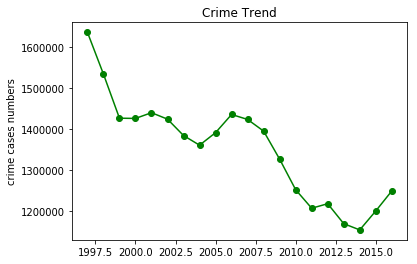

In [5]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(crimeData['Year'], crimeData['Violent crime'], color='green', marker='o', linestyle='solid')

# add a title
plt.title("Crime Trend")

# add a label to the y-axis
plt.ylabel("crime cases numbers")
plt.show()

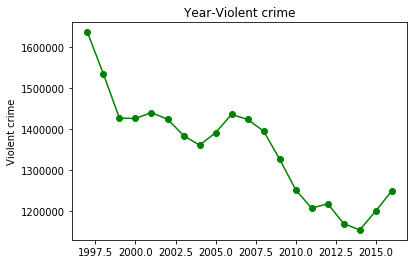

In [6]:
make_chart_simple_line_chart(plt,crimeData['Year'], crimeData['Violent crime'])

In [21]:
crimeData['Year'].name

'Year'

In [9]:
crimeData.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v']

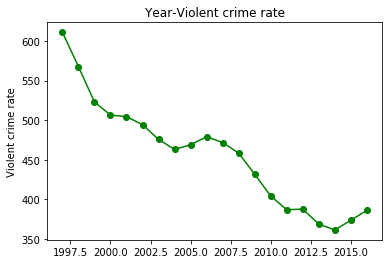

In [7]:
make_chart_simple_line_chart(plt,crimeData['Year'], crimeData['Violent crime rate'])

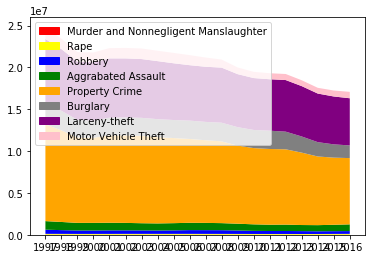

In [33]:
import numpy as np
import matplotlib.patches as mpatches

#stacked area chart 
# x = np.arange(20)
# plt.xlabel = (1997, 2017, 1)
x = ('1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016')
plt.stackplot(x,crimeData['e'],crimeData['i'],crimeData['k'],crimeData['m'],crimeData['o'],crimeData['q'],crimeData['s'],crimeData['u'], colors = ['red','yellow','blue','green','orange','gray','purple','pink'])


red_patch = mpatches.Patch(color = 'red', label = 'Murder and Nonnegligent Manslaughter')
yellow_patch = mpatches.Patch(color = 'yellow',label = 'Rape')
blue_patch = mpatches.Patch(color = 'blue', label = 'Robbery')
green_patch = mpatches.Patch(color = 'green', label = 'Aggrabated Assault')
orange_patch = mpatches.Patch(color = 'orange', label = 'Property Crime')
gray_patch = mpatches.Patch(color = 'gray', label = 'Burglary')
purple_patch = mpatches.Patch(color = 'purple', label = 'Larceny-theft')
pink_patch = mpatches.Patch(color = 'pink', label= 'Motor Vehicle Theft')

plt.legend(handles = [red_patch,yellow_patch,blue_patch,green_patch,orange_patch,gray_patch,purple_patch, pink_patch], loc = 'upper left')
plt.show()

In [8]:
type(crimeData)

pandas.core.frame.DataFrame

In [30]:
type(crimeData['a'])

pandas.core.series.Series